# 1. Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mdtraj as md
import dmaps
from numpy import matlib as mb

In [2]:
import math

# 2. Load Trajectories

In [3]:
traj = np.loadtxt('h2t series.txt', delimiter=',')

In [4]:
traj.shape

(50001,)

# 3. Mutual Information

Finishing importing data, there are 50001 snapshots.
the maximun value is 2.797, and the minimum values is 0.327 

Enter the number of bins you want make:5
Enter the largest tao you want to test from 0:16


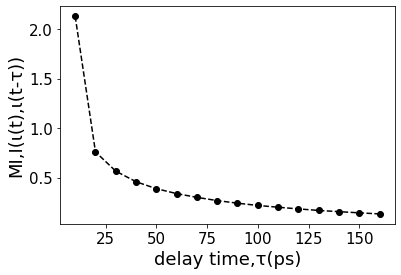

In [5]:
def MI(traj):
    length = len(traj)
    ma = max(traj)
    mi = min(traj)
    Delt = ma - mi #gap between max and min, will be use later
    print('Finishing importing data, there are %d snapshots.\nthe maximun value is %2.3f, and the minimum values is %2.3f \n'%(length,ma,mi))
    #print out the total number of snapshots, and the max,min
    
    B = input('Enter the number of bins you want make:') #determin bin number
    T = input('Enter the largest tao you want to test from 0:') #determin largest tao
    B = int(B)
    T = int(T)
    I = np.zeros(T) #Mutual Information
    
    for t in range(T):
        Pt = np.zeros(T)  #x(t)'s probabilistic trajribution among B bins
        Ptt = np.zeros(T) #x(t+tao)'s probabilistic trajribution among B bins
        Pxy = np.zeros((T,T)) #combination probabilistic trajribution among B^2 bins
        
        for i in range(0,length-t,1): # effective number, because there are delay time T
            
            temp1 = math.floor((traj[i]-mi)/Delt*B) # this will automatically direct M(i) to its bin
 
            if traj[i] == ma: #for maximun one, there will not be more bin for it
                temp1 = temp1-1
            
            Pt[temp1] = Pt[temp1]+1 #add one point into this bin
            
            temp2 = math.floor((traj[i+t]-mi)/Delt*B)
            
            if traj[i+t] == ma:
                temp2 = temp2-1
          
            Ptt[temp2] = Ptt[temp2]+1
        
            Pxy[temp1,temp2] = Pxy[temp1,temp2]+1 #add one point into this 2-d bin
     
        PT = Pt/(length-t) #transfer bin counting trajribution to probabilistic trajribution
        PTT = Ptt/(length-t)
        PXY = Pxy/(length-t)
    
        for i in range(T): #sum over number of bins
            for j in range(T):
                if PXY[i,j]!=0 and PT[i]!=0 and PTT[j]!=0:
                    I[t] = I[t] + PXY[i,j]*math.log2(PXY[i,j]/PT[i]/PTT[j])
    
    
    fig, ax = plt.subplots()
    ax.plot(np.array(range(1,len(I)+1,1))*10, I, 'k--', marker='o')
    ax.set_xlabel("delay time,\u03C4(ps)",fontsize=18)
    ax.set_ylabel("MI,I(\u03B9(t),\u03B9(t-\u03C4))",fontsize=18) 
    ax.tick_params(labelsize=15)
    plt.draw()
    plt.show()

MI(traj)